#### [ 산점도 -버블 그래프 ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함 

In [1]:
# [1] 모듈 로딩 
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# [2] 데이터 준비
F_DATA=r'C:\Users\LG\Desktop\EX_PANDAS06\DATA\auto_mpg.csv'


In [3]:
# [3] CSV => DataFrame으로 저장
dataDF=pd.read_csv(F_DATA)

In [4]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'], 2), corrSR

(-0.83,
 mpg             1.000000
 cylinders      -0.775396
 displacement   -0.804203
 weight         -0.831741
 acceleration    0.420289
 model year      0.579267
 origin          0.563450
 Name: mpg, dtype: float64)

In [6]:
corrSR['weight'], corrSR.iloc[3]

(-0.8317409332443344, -0.8317409332443344)

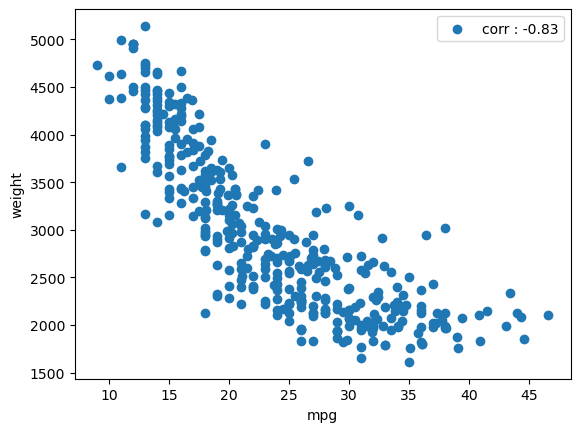

In [7]:
# - [4-2] 시각화 
plt.scatter(dataDF.mpg, dataDF.weight, label=f'corr : {round(corrSR["weight"], 2)}')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

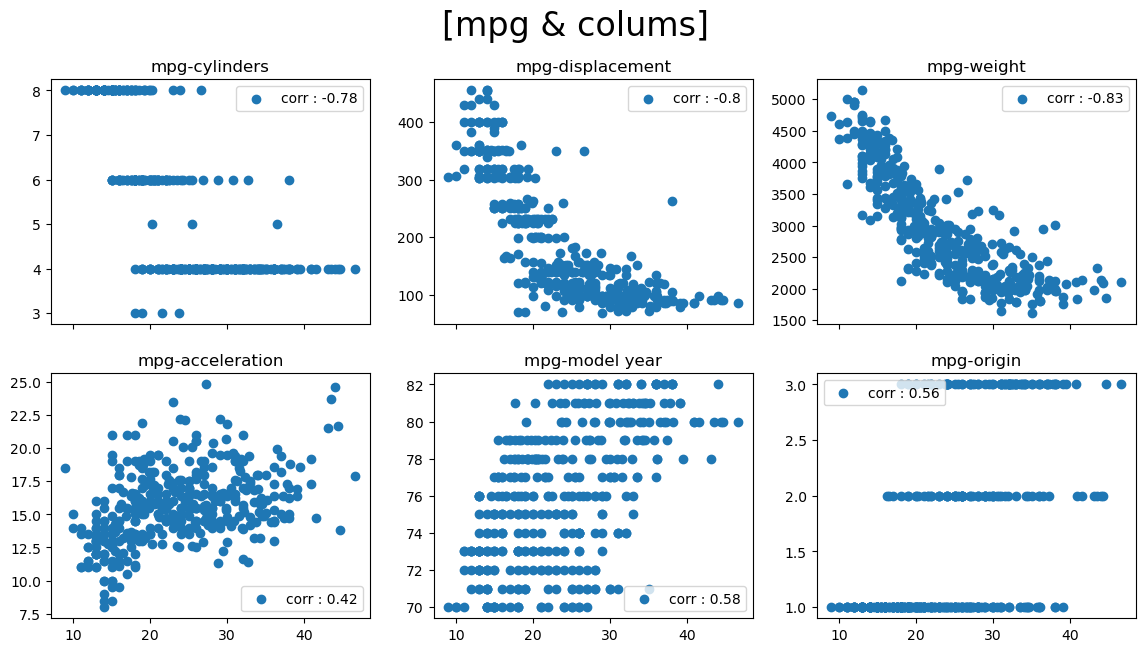

In [8]:
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화 
# - (1)그래프 담을 창 생성
fig=plt.figure(figsize=(14,7))

# - (2)그래프 담을 공간 생성 axes
axs=fig.subplots(2,3, sharex=True)
for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axs[row, col].scatter(dataDF['mpg'], 
                              dataDF[col_name], 
                              label=f'corr : {round(corrSR[col_name], 2)}')
        axs[row, col].set_title(f'mpg-{col_name}')
        axs[row, col].legend()

fig.suptitle("[mpg & colums]", fontsize=24)

plt.show()

In [9]:
corrSR.index

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

- [5] 연비와 무게 , 실린더 수의 관계 시각화
 * 연비와 무게 반비례 관계, 상관관계가 높음 
 * 연비와 실린더 개수도 반비례 관계
 

In [10]:
# - mpg 와 weight 관계 산점도(scatter)시각화


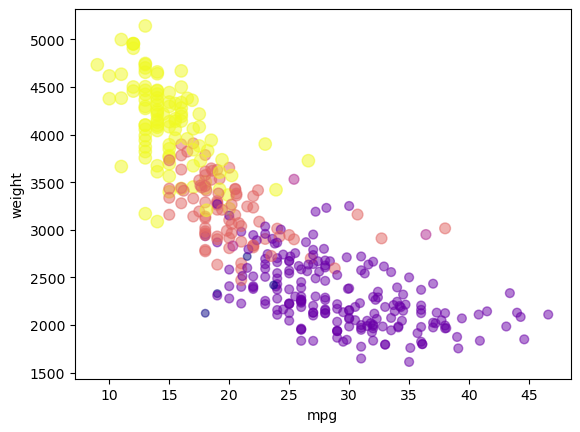

In [12]:
plt.scatter(dataDF['mpg'],dataDF['weight'],s =dataDF['cylinders']*10,c=dataDF['cylinders'],cmap='plasma',alpha=0.5)
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

In [13]:
dataDF['cylinders'].count()

398